1. Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
menu_data = pd.read_csv("menu.csv")
menu_data.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


(a) Plot the histogram of the Calories. 

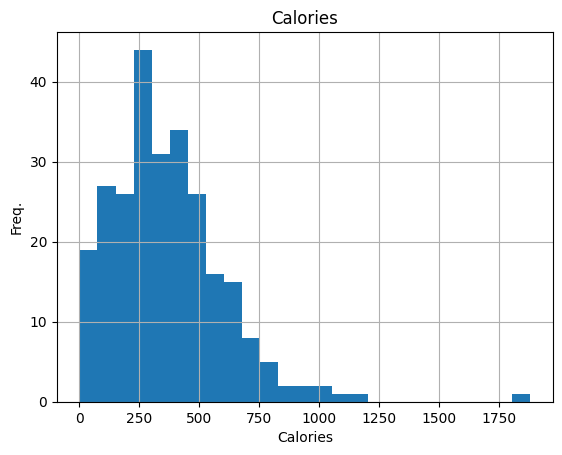

In [3]:
menu_data["Calories"].hist(bins=25)
plt.xlabel('Calories')
plt.ylabel('Freq.')
plt.title('Calories')
plt.show()

(b) Plot the correlation heatmap between features and Calories.

Prior to looking at the correlation between the features and the calories, we need to convert the categorical fields to numerical fields. For our menu data, we have three categorical fields:

1. Category
2. Item
3. Serving Size

In my opinion, we can disregard the "Item" field when looking at correlation, as this contains the names of each item. I believe "Category" (breakfast, beverages, meat type, etc.) and "Serving Size" are more important to include when looking at the correlation. 

For the "Category" conversion, we can use standard one-hot encoding to create new fields for each category type.

For "Serving Size" I will be changing the type of the field itself from string to float, keeping only the oz value of the serving size as a numerical value (while discarding the "oz" suffix, and the gram values).

In [4]:
# Copy the original menu dataset to manipulate the fields
menu_data_transformed = menu_data.copy()

menu_data_transformed = pd.get_dummies(menu_data_transformed, columns=['Category'], prefix='Category')

# Convert 'Serving Size' from string to oz float value
def extract_oz(serving_size):
    try:
        return float(serving_size.split(' ')[0])
    except (ValueError, IndexError):
        return None

menu_data_transformed['Serving Size (oz)'] = menu_data_transformed['Serving Size'].apply(extract_oz)
menu_data_transformed = menu_data_transformed.drop(columns=['Serving Size', 'Item'])

menu_data_transformed.head()


,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Category_Beef & Pork,Category_Beverages,Category_Breakfast,Category_Chicken & Fish,Category_Coffee & Tea,Category_Desserts,Category_Salads,Category_Smoothies & Shakes,Category_Snacks & Sides,Serving Size (oz)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,...,False,False,True,False,False,False,False,False,False,4.8
1,250,70,8.0,12,3.0,15,0.0,25,8,770,...,False,False,True,False,False,False,False,False,False,4.8
2,370,200,23.0,35,8.0,42,0.0,45,15,780,...,False,False,True,False,False,False,False,False,False,3.9
3,450,250,28.0,43,10.0,52,0.0,285,95,860,...,False,False,True,False,False,False,False,False,False,5.7
4,400,210,23.0,35,8.0,42,0.0,50,16,880,...,False,False,True,False,False,False,False,False,False,5.7


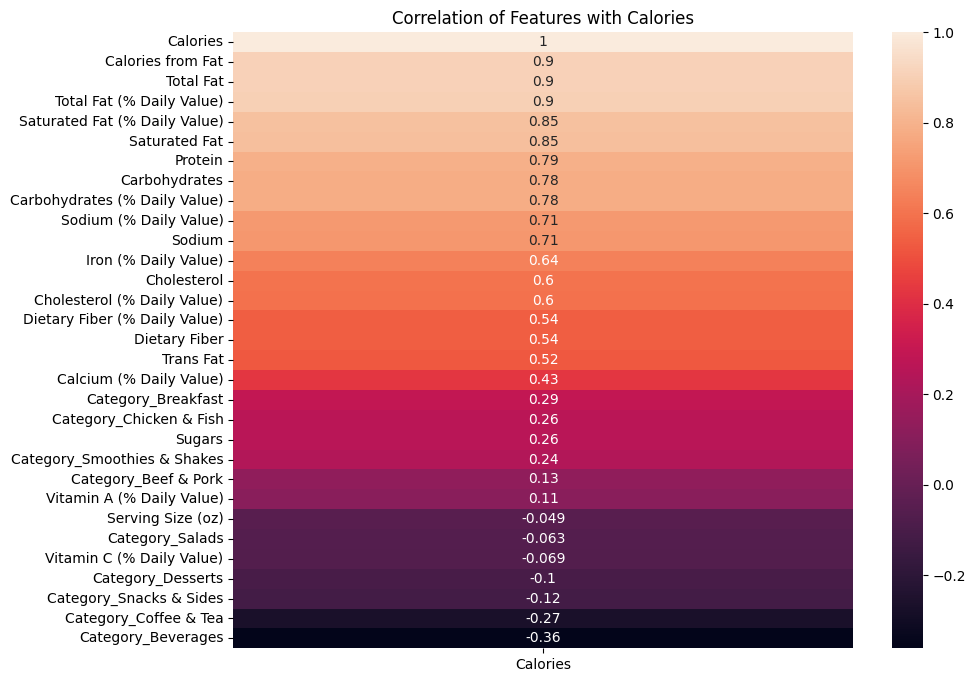

In [5]:
matrix = menu_data_transformed.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix[['Calories']].sort_values(by='Calories', ascending=False), annot=True)
plt.title('Correlation of Features with Calories')
plt.show()

(c) List the features which have the second and third largest positive correlation with Calories. Note: if you encounter multiple features actually mean the same thing, only list the feature with the largest correlation. For instance, if you see Sodium and Sodium (%Daily Value) and the former has larger correlation with Calories, list Sodium only.

The features with the second and third largest positive correlations with calories are 'Calories from Fat' and 'Total Fat' - since these are features that share the same correlation with Calories, we'll look at the next largest correlation: 'Saturated Fat'.

These results make sense, as the menu items with high concentrations of fat will in turn be highly calorie-dense.

(d) Report all features which have negative correlation with Calories. Does your result meet your expectation?

For our transformed dataset, the negatively correlated fields are as follows:

- Serving Size
- Salads (category)
- Vitamin C %DV
- Desserts (category)
- Snacks & Sides (category)
- Coffee & Tea (category)
- Beverages (category)

This result mostly matches my expectation, while also raising some questions for me. I am a bit surprised to see the Desserts category negatively correlated with calories, as desserts tend to be highly caloric foods. Also, I was thinking there was a chance Beverages would be more correlated with calories, as sodas tend to be highly caloric as well.

2. Plotting:
(a) Plot the scatter plot for ‘features vs. Calories’ for all features found in 1(c) and  (d).

For the two most highly correlated fields, we will look at 'Total Fat' and 'Saturated Fat'

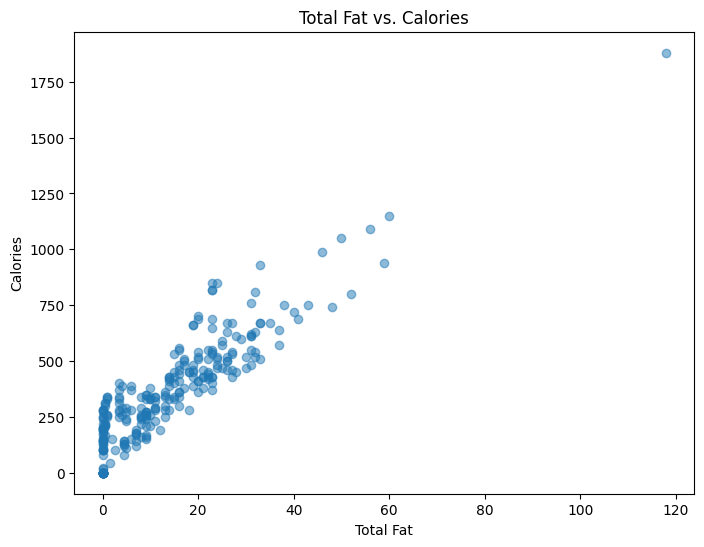

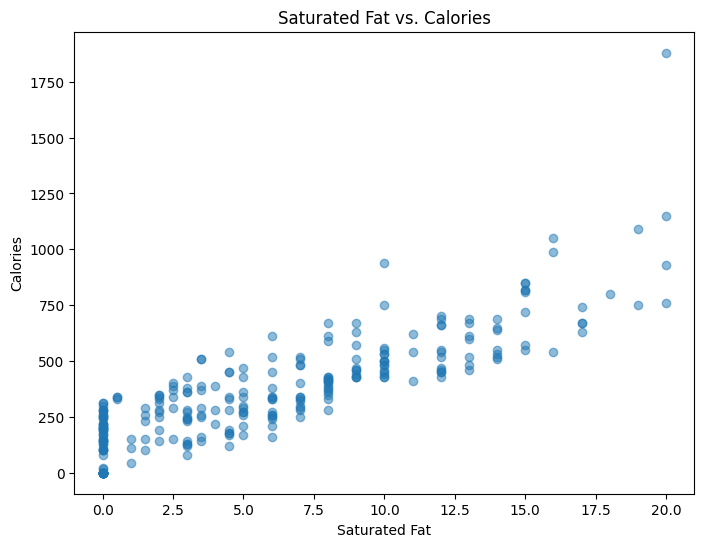

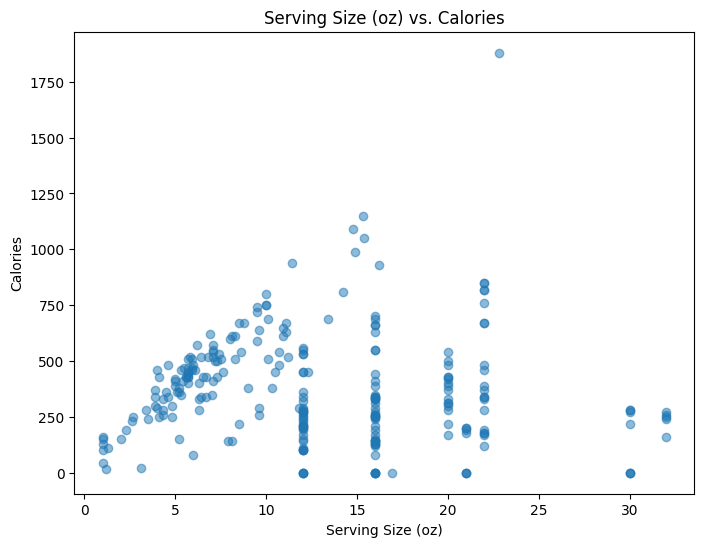

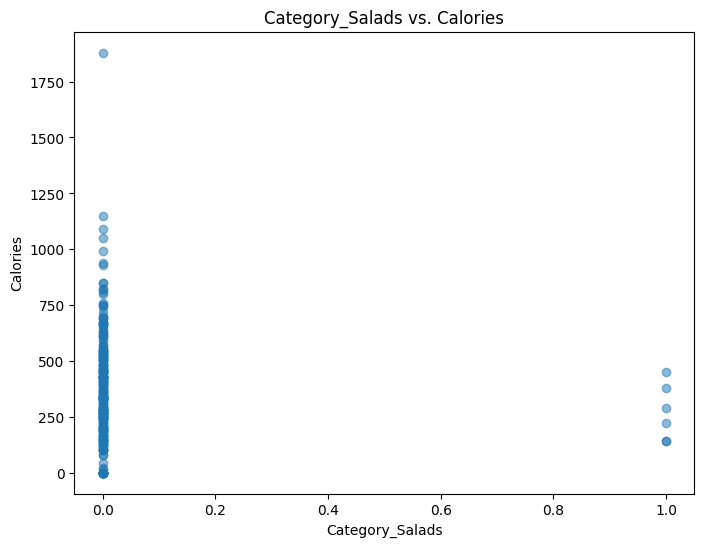

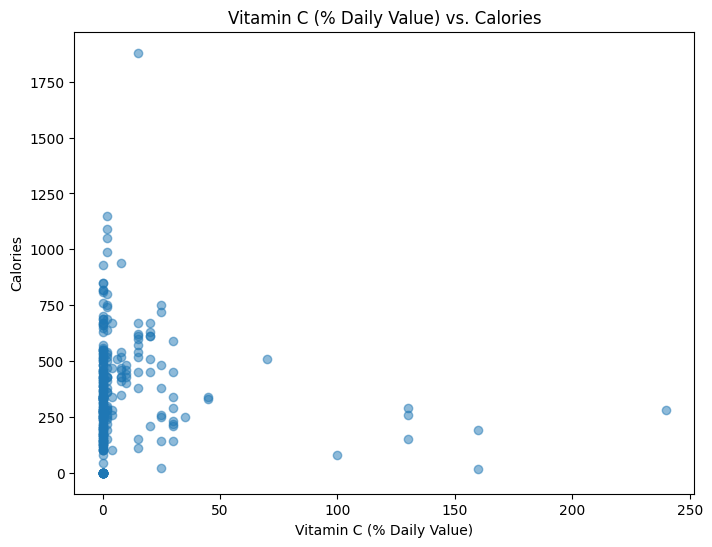

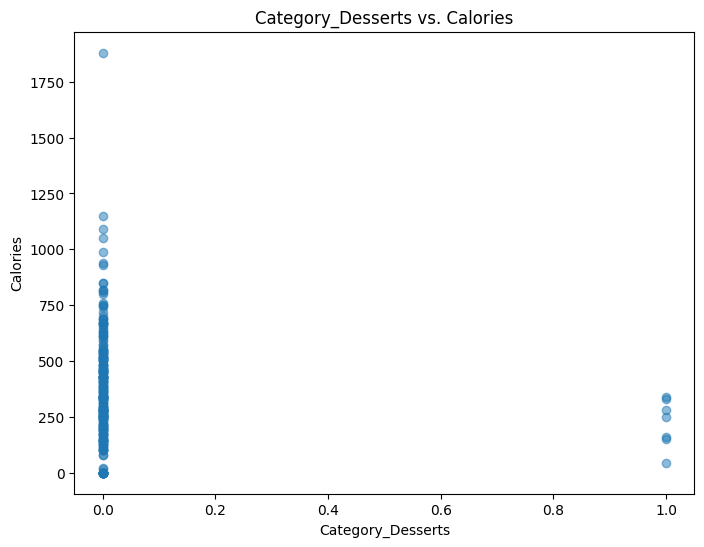

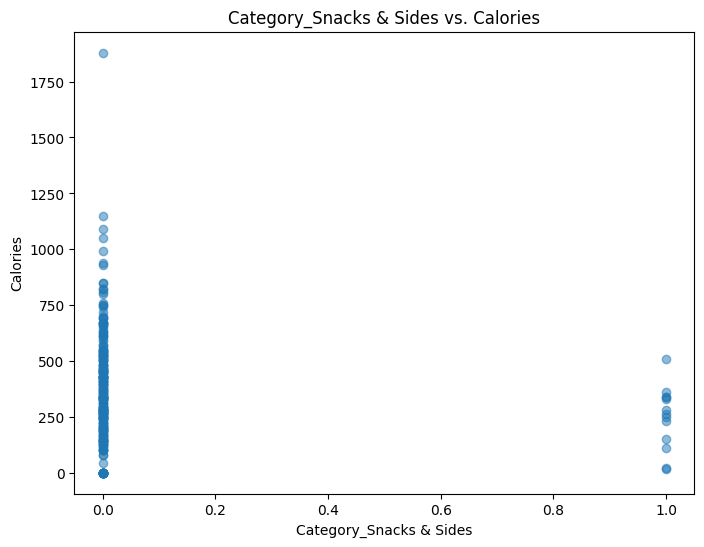

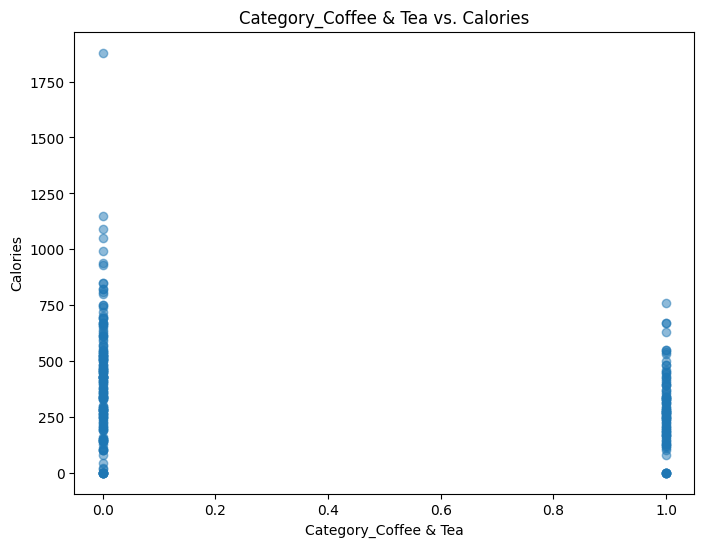

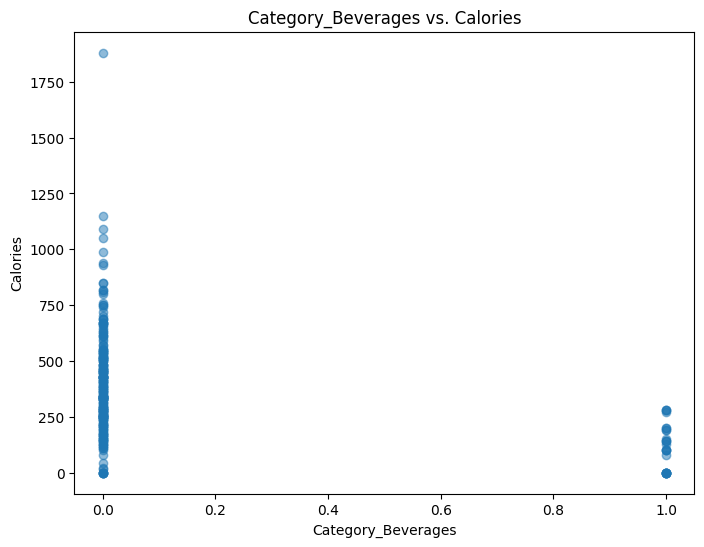

In [6]:
high_corr_features = ['Total Fat', 'Saturated Fat']
neg_corr_features = ['Serving Size (oz)', 'Category_Salads', 'Vitamin C (% Daily Value)', 'Category_Desserts', 'Category_Snacks & Sides', 'Category_Coffee & Tea', 'Category_Beverages']

for feature in high_corr_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(menu_data_transformed[feature], menu_data_transformed['Calories'], alpha=0.5)
    plt.title(f'{feature} vs. Calories')
    plt.xlabel(feature)
    plt.ylabel('Calories')
    plt.show()

for feature in neg_corr_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(menu_data_transformed[feature], menu_data_transformed['Calories'], alpha=0.5)
    plt.title(f'{feature} vs. Calories')
    plt.xlabel(feature)
    plt.ylabel('Calories')
    plt.show()

Through the creation of these scatterplots, I've realized that they are not the best tool for visualizing the correlation between a one-hot encoded variable (all of our categories) and a continuous variable (such as Calories). I am hoping the relationship will be better visualized using a box plot in the next step.

(b) Plot the box plot for all features found in 1(c) and 1(d) correspondingly.

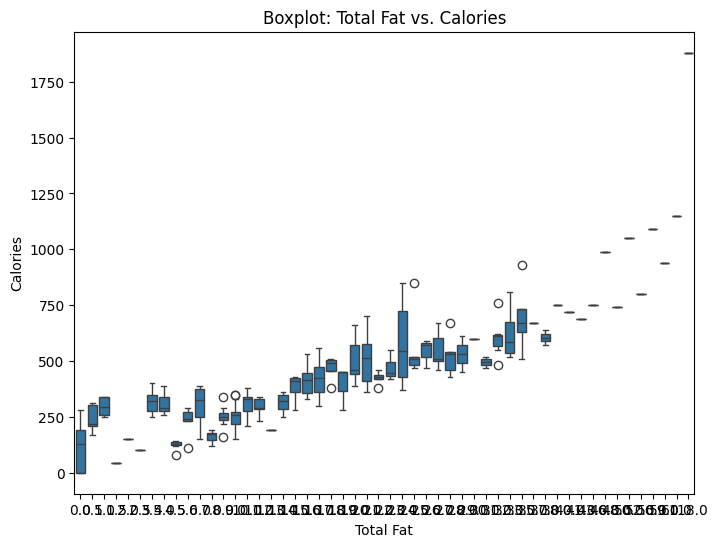

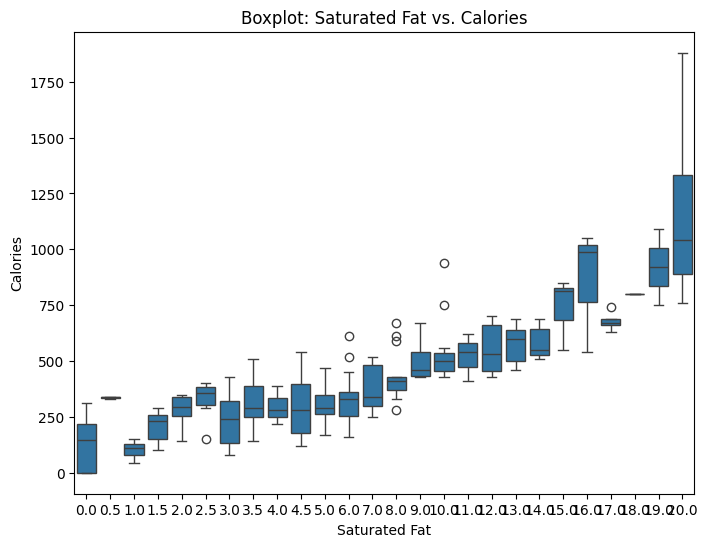

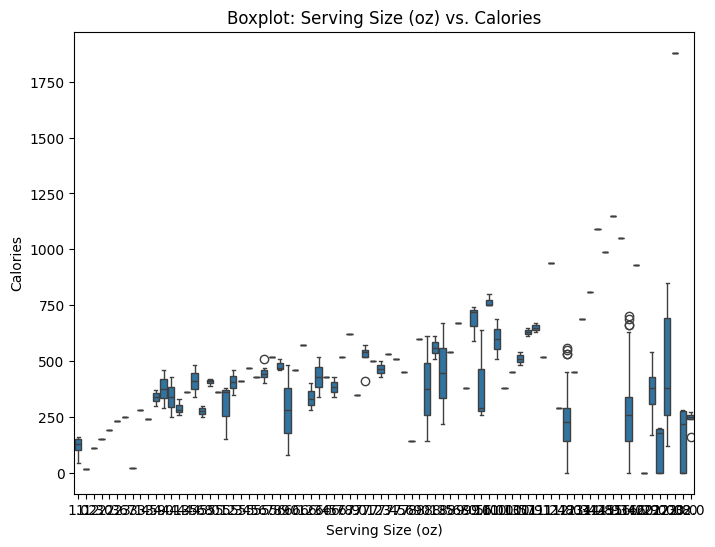

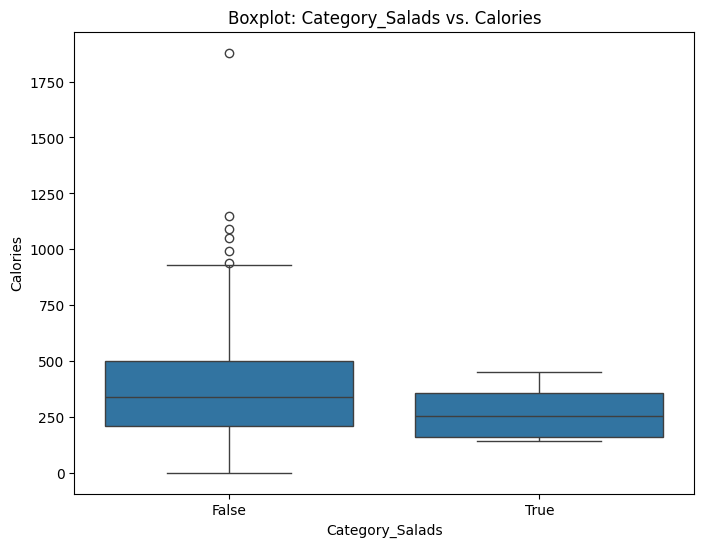

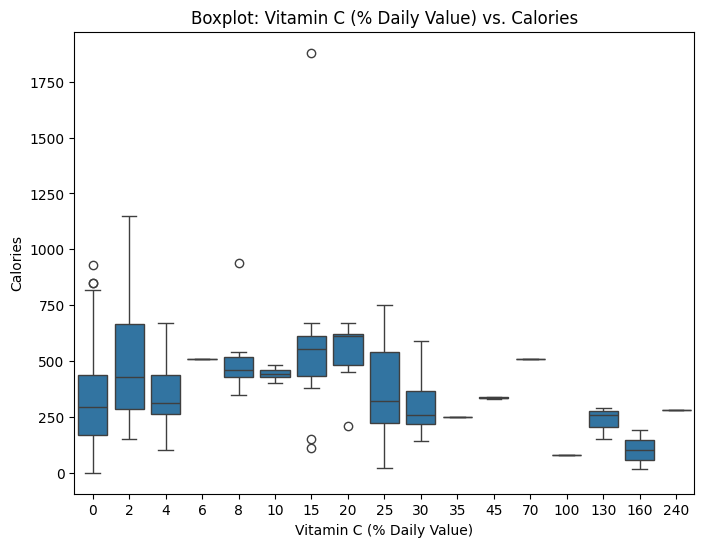

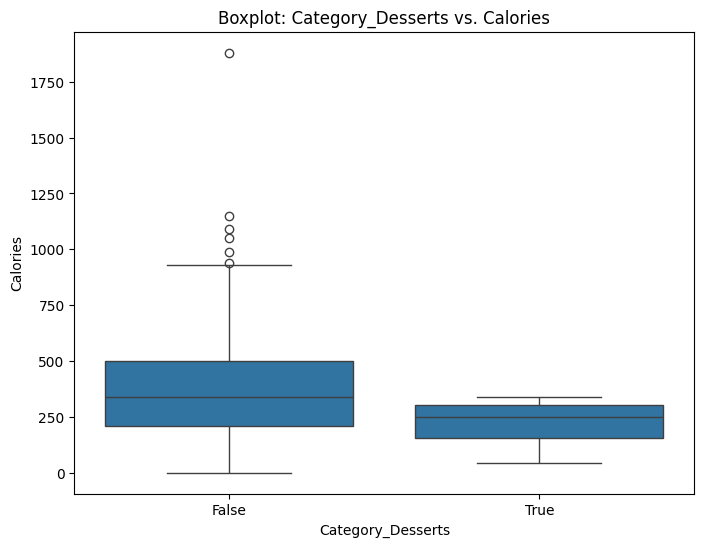

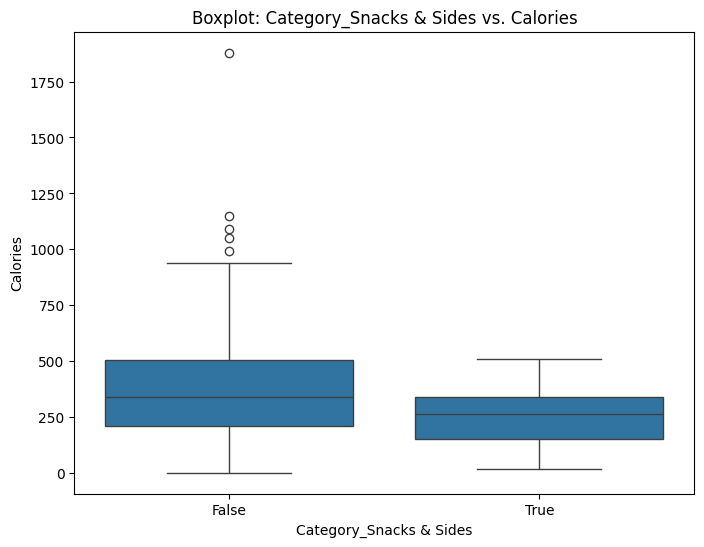

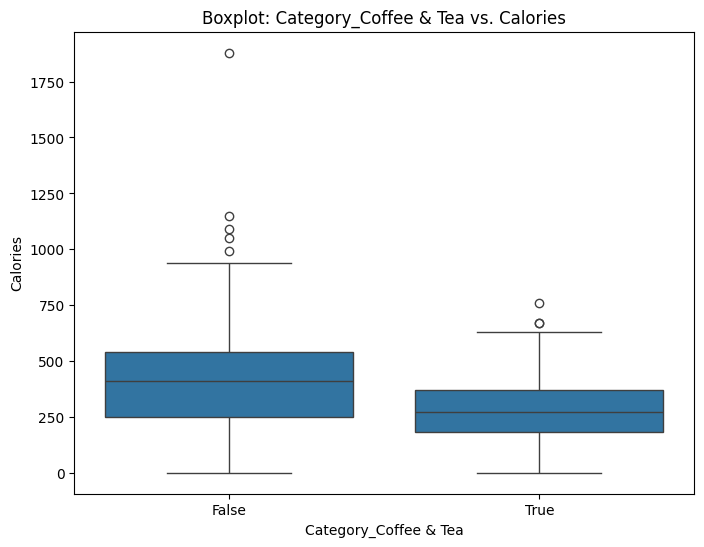

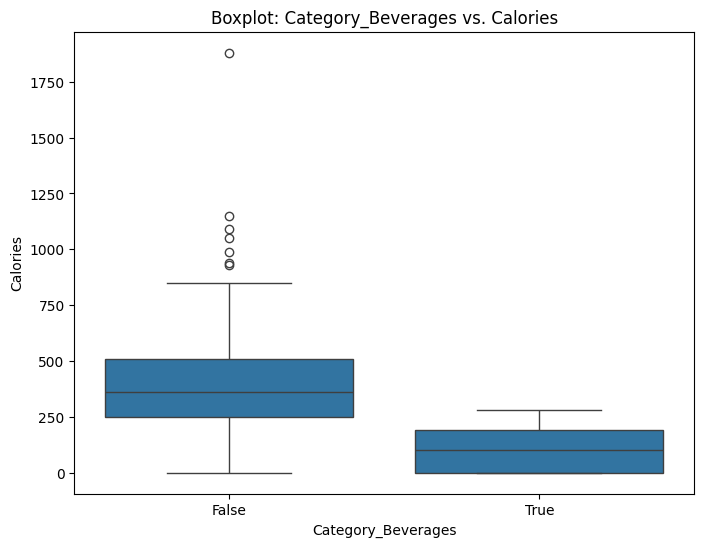

In [7]:
for feature in high_corr_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=menu_data_transformed[feature], y=menu_data_transformed['Calories'])
    plt.title(f'Boxplot: {feature} vs. Calories')
    plt.xlabel(f'{feature}')
    plt.ylabel('Calories')
    plt.show()

for feature in neg_corr_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=menu_data_transformed[feature], y=menu_data_transformed['Calories'])
    plt.title(f'Boxplot: {feature} vs. Calories')
    plt.xlabel(f'{feature}')
    plt.ylabel('Calories')
    plt.show()

After creating the boxplots for these variables vs. Categories, it is clear that boxplots serve better to visualize data for discrete variables. On the flip side, scatter plots seem to do a better job visualizing continuous variables.

3. Data Pre-processing: missing values (20 points):
(a) Report the median and standard deviation for all numerical features.

In [8]:
numerical_features = ['Calories', 
                      'Calories from Fat', 
                      'Total Fat', 
                      'Total Fat (% Daily Value)',
                      'Saturated Fat',
                      'Saturated Fat (% Daily Value)',
                      'Trans Fat',
                      'Cholesterol',
                      'Cholesterol (% Daily Value)',
                      'Sodium',
                      'Sodium (% Daily Value)',
                      'Carbohydrates',
                      'Carbohydrates (% Daily Value)',
                      'Dietary Fiber',
                      'Dietary Fiber (% Daily Value)',
                      'Sugars',
                      'Protein',
                      'Vitamin A (% Daily Value)',
                      'Vitamin C (% Daily Value)',
                      'Calcium (% Daily Value)',
                      'Iron (% Daily Value)'
                      ]

for feature in numerical_features:
    median_value = menu_data[feature].median()
    std_dev = round(menu_data[feature].std(), 2)
    print(f"{feature} Median: {median_value}")
    print(f"{feature} Std Dev: {std_dev}")

Calories Median: 340.0
Calories Std Dev: 240.27
Calories from Fat Median: 100.0
Calories from Fat Std Dev: 127.88
Total Fat Median: 11.0
Total Fat Std Dev: 14.21
Total Fat (% Daily Value) Median: 17.0
Total Fat (% Daily Value) Std Dev: 21.89
Saturated Fat Median: 5.0
Saturated Fat Std Dev: 5.32
Saturated Fat (% Daily Value) Median: 24.0
Saturated Fat (% Daily Value) Std Dev: 26.64
Trans Fat Median: 0.0
Trans Fat Std Dev: 0.43
Cholesterol Median: 35.0
Cholesterol Std Dev: 87.27
Cholesterol (% Daily Value) Median: 11.0
Cholesterol (% Daily Value) Std Dev: 29.09
Sodium Median: 190.0
Sodium Std Dev: 577.03
Sodium (% Daily Value) Median: 8.0
Sodium (% Daily Value) Std Dev: 24.03
Carbohydrates Median: 44.0
Carbohydrates Std Dev: 28.25
Carbohydrates (% Daily Value) Median: 15.0
Carbohydrates (% Daily Value) Std Dev: 9.42
Dietary Fiber Median: 1.0
Dietary Fiber Std Dev: 1.57
Dietary Fiber (% Daily Value) Median: 5.0
Dietary Fiber (% Daily Value) Std Dev: 6.31
Sugars Median: 17.5
Sugars Std Dev

(b) Write the code to replace outliers of all numerical features in (a) with NaN. (Hint: Use the 3 sigma deviation to find outliers). Report the total number of NaNs corresponding to each feature.

In [9]:
for feature in numerical_features:
    mean = menu_data[feature].mean()
    std_dev = menu_data[feature].std()
    upper_bound = mean + 3 * std_dev
    lower_bound = mean - 3 * std_dev

    menu_data.loc[
        (menu_data[feature] > upper_bound) | 
        (menu_data[feature] < lower_bound), feature
    ] = np.nan

    total_nan = menu_data[feature].isna().sum()

    print(f"{feature} NaN Values: {total_nan}")

Calories NaN Values: 3
Calories from Fat NaN Values: 3
Total Fat NaN Values: 3
Total Fat (% Daily Value) NaN Values: 3
Saturated Fat NaN Values: 0
Saturated Fat (% Daily Value) NaN Values: 0
Trans Fat NaN Values: 9
Cholesterol NaN Values: 4
Cholesterol (% Daily Value) NaN Values: 4
Sodium NaN Values: 3
Sodium (% Daily Value) NaN Values: 3
Carbohydrates NaN Values: 5
Carbohydrates (% Daily Value) NaN Values: 5
Dietary Fiber NaN Values: 4
Dietary Fiber (% Daily Value) NaN Values: 4
Sugars NaN Values: 3
Protein NaN Values: 2
Vitamin A (% Daily Value) NaN Values: 6
Vitamin C (% Daily Value) NaN Values: 7
Calcium (% Daily Value) NaN Values: 0
Iron (% Daily Value) NaN Values: 3


(c) Write the code to replace the missing values ( NaN) with mean values. Report the median and standard deviation. Compare your result with (a) and write one sentence to explain your discovery.

In [10]:
for feature in numerical_features:
    mean = menu_data[feature].mean()
    menu_data[feature].fillna(mean, inplace=True)

    median_value = menu_data[feature].median()
    std_dev = round(menu_data[feature].std(), 2)
    print(f"{feature} Median: {median_value}")
    print(f"{feature} Std Dev: {std_dev}")

Calories Median: 340.0
Calories Std Dev: 210.71
Calories from Fat Median: 100.0
Calories from Fat Std Dev: 107.99
Total Fat Median: 11.0
Total Fat Std Dev: 11.99
Total Fat (% Daily Value) Median: 17.0
Total Fat (% Daily Value) Std Dev: 18.45
Saturated Fat Median: 5.0
Saturated Fat Std Dev: 5.32
Saturated Fat (% Daily Value) Median: 24.0
Saturated Fat (% Daily Value) Std Dev: 26.64
Trans Fat Median: 0.0
Trans Fat Std Dev: 0.33
Cholesterol Median: 35.0
Cholesterol Std Dev: 59.44
Cholesterol (% Daily Value) Median: 11.0
Cholesterol (% Daily Value) Std Dev: 19.81
Sodium Median: 190.0
Sodium Std Dev: 520.23
Sodium (% Daily Value) Median: 8.0
Sodium (% Daily Value) Std Dev: 21.68
Carbohydrates Median: 44.0
Carbohydrates Std Dev: 25.23
Carbohydrates (% Daily Value) Median: 15.0
Carbohydrates (% Daily Value) Std Dev: 8.41
Dietary Fiber Median: 1.0
Dietary Fiber Std Dev: 1.42
Dietary Fiber (% Daily Value) Median: 5.0
Dietary Fiber (% Daily Value) Std Dev: 5.71
Sugars Median: 17.5
Sugars Std Dev

After filling the NaN values for each feature with the mean values, we now see that the standard deviation is lower for every feature that contained NaN values, while the median stays the same. This makes sense, because replacing the NaN values with the mean reduced the range/variability of the data. Median stayed the same because it is not outlier-sensitive.

4. Linear Regression (20 points):
Note: Please use the original dataset for this question.
(a) Train a predictor to predict the Calories as follows:

Calories = θ0 + θ1 × [ Carbohydrates ] + θ2 × [ Protein ] + θ3 × [ Total Fat ]

Report the values of θ0, θ1, θ2 and θ3. Briefly describe your interpretation of these values, i.e., what do θ0, θ1, θ2 and θ3 represent? Explain these in terms of the features and labels.

In [11]:
X = menu_data[['Carbohydrates', 'Protein', 'Total Fat']]
y = menu_data['Calories']

model = LinearRegression()
model.fit(X, y)
theta0 = model.intercept_
theta1, theta2, theta3 = model.coef_

print(f'θ0: {theta0}')
print(f'θ1: {theta1}')
print(f'θ2: {theta2}')
print(f'θ3: {theta3}')

θ0: 24.667408497207134
θ1: 3.343922671290473
θ2: 4.23810633718889
θ3: 9.303099431615147


θ0 represents the intercept - if all three of our features (carbs, protein, and fat) are zero, this is the number of calories the model expects.

θ1 represents the average increase in calories for every gram of carbohydrates - the model would expect an avg. increase of 3.34 calories for every gram of carbs.

θ2 represents the average increase in calories for every gram of protein - the model would expect an avg. increase of 4.24 calories for every gram of protein.

θ3 represents the average increase in calories for every gram of fat - the model would expect an avg. increase of 9.30 calories for every gram of fat.

(b) Train another predictor to predict the Calories as follows:
Calories = θ0 + θ1 × [ Total Fat ]

Report the values of θ0 and θ1. Note that the coefficient here might be different than the one from (a) though they refer to the same feature. Provide an explanation as to why these coefficients might vary significantly.

In [12]:
X = menu_data[['Total Fat']]
y = menu_data['Calories']

model = LinearRegression()
model.fit(X, y)
theta0 = model.intercept_
theta1 = model.coef_[0]

print(f'θ0: {theta0}')
print(f'θ1: {theta1}')

θ0: 159.27885100524307
θ1: 14.71135673002105


The coefficients vary significantly from the previous model, and understandably so. This is because this model is only taking fat values into account when predicting the calorie intercept and the total fat coefficient. In the previous model, we were also taking carbs and protein into account, leading to more accurate predictive values. 

(c) Split the data into two fractions – the first 90% for training, and the remaining 10% testing (based on the order they appear in the file). Train the model using all the features available in the training set only. What is the model’s MSE on the training and on the test set? Did it perform too well on the training set than the test set? If yes, what could be the reason?  

In [13]:
X = menu_data_transformed.drop(columns=['Calories'])
y = menu_data_transformed['Calories']

# Split the data based on the order each row appears in the file
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate MSE for training and test set
train_mse = round(mean_squared_error(y_train, train_predictions), 2)
test_mse = round(mean_squared_error(y_test, test_predictions), 2)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")

Train Mean Squared Error: 14.28
Test Mean Squared Error: 84.19


The model performed significantly better on the training set than the test set. I believe this is because the test set is quite small at only 10% of the entire dataset. Since this is a small dataset as-is, it is possible that the final 10% of the dataset is not representative of the dataset as a whole.

After looking at the dataset as it currently exists, I can confirm that the final 10% of the dataset is made up of mainly smoothies and other various drinks. Since the dataset is ordered this way, it makes sense that the training we are performing does not accurately predict these values.

When changing the "Shuffle" parameter on the train_test_split to True (shuffling the dataset prior to splitting into train/test) we see much better accuracy. Additionally, increasing the test set size to 20 or 30 percent of the dataset also improves testing accuracy.